In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

In [4]:
od.version()

'0.1.20'

In [5]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [6]:
import os

In [7]:
data_dir = '/content/weather-dataset-rattle-package'

In [8]:
train_csv = data_dir + '\weatherAUS.csv'

In [9]:
train_csv

'/content/weather-dataset-rattle-package\\weatherAUS.csv'

Load the dataset from weather.aus data

In [10]:
!pip install pandas --quiet

In [12]:
import pandas as pd

In [14]:
raw_df = pd.read_csv('/content/weatherAUS.csv')

In [15]:
raw_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

The dataset contains over 145000 rows and 23 columns. The datasets contains date, numeric and categorical column. Our objective is to create a model to predict the value in the columns Rain Tomorrow.

Let's check the data types and missing values in the various columns

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of RainTomorrow or RainToday is missing to make our Analysis and Modeling simpler.

In [17]:
raw_df.dropna(subset=['RainTomorrow', 'RainToday'], inplace=True)

In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

Exploratory Data Analysis

In [19]:
!pip install plotly matplotlib seaborn --quiet

In [20]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000'

In [21]:
raw_df.Location.unique

<bound method Series.unique of 0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145454     Uluru
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
Name: Location, Length: 140787, dtype: object>

In [22]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [23]:
px.histogram(raw_df, x='Temp3pm', title='Temprature at 3 pm vs. Rain Tomorrow', color='RainTomorrow')

In [24]:
px.histogram(raw_df, x='RainTomorrow', title='Rain Tomorrow vs. Rain Today',color='RainToday',)

In [25]:
px.scatter(raw_df.sample(2000), title='Min Temp. vs Max Temp.', x='MinTemp', y='MaxTemp', color='RainToday')

In [26]:
px.scatter(raw_df.sample(2000), title='Temp(3 pm). vs Humidity(3 pm).', x='Temp3pm', y='Humidity3pm', color='RainTomorrow')

In [92]:
!pip install scikit-learn --upgrade --quiet

     |████████████████████████████████| 22.3MB 1.7MB/s 


In [27]:
from sklearn.model_selection import train_test_split

In [33]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [34]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


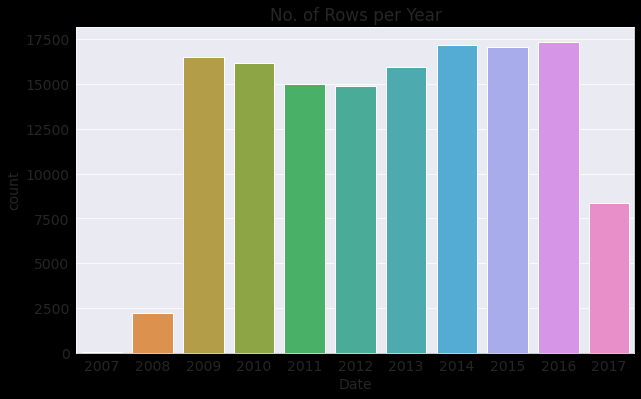

In [37]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [38]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [39]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [40]:
train_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
144548  2014-12-27    Uluru     16.9  ...     31.8         No            No
144549  2014-12-28    Uluru     15.1  ...     34.8         No            No
144550  2014-12-29    Uluru     17.3  ...     35.7         No            No
144551  2014-12-30    Uluru     20.1  ...     37.2         No            No
144552  2014-12-31    Uluru     22.5  ...     37.4         No            No

[97988 rows x 23 columns]

In [41]:
val_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2133    2015-01-01   Albury     11.4  ...     32.7         No            No
2134    2015-01-02   Albury     15.5  ...     38.2         No            No
2135    2015-01-03   Albury     17.1  ...     37.0         No            No
2136    2015-01-04   Albury     26.0  ...     30.9         No            No
2137    2015-01-05   Albury     19.0  ...     32.5         No            No
...            ...      ...      ...  ...      ...        ...           ...
144913  2015-12-27    Uluru     20.5  ...     33.0         No            No
144914  2015-12-28    Uluru     18.0  ...     35.0         No            No
144915  2015-12-29    Uluru     17.5  ...     34.7         No            No
144916  2015-12-30    Uluru     20.0  ...     38.4         No            No
144917  2015-12-31    Uluru     19.3  ...     35.8         No            No

[17089 rows x 23 columns]

In [42]:
test_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2498    2016-01-01   Albury     20.4  ...     36.7         No            No
2499    2016-01-02   Albury     20.9  ...     31.7         No           Yes
2500    2016-01-03   Albury     18.4  ...     19.5        Yes           Yes
2501    2016-01-04   Albury     17.3  ...     21.6        Yes           Yes
2502    2016-01-05   Albury     15.5  ...     22.2        Yes            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[25710 rows x 23 columns]

Indentifying Input and Target Columns

In [44]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [45]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [46]:
target_col

'RainTomorrow'

In [48]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [49]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [50]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [51]:
train_inputs

Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm  RainToday
0        Albury     13.4     22.9  ...     16.9     21.8         No
1        Albury      7.4     25.1  ...     17.2     24.3         No
2        Albury     12.9     25.7  ...     21.0     23.2         No
3        Albury      9.2     28.0  ...     18.1     26.5         No
4        Albury     17.5     32.3  ...     17.8     29.7         No
...         ...      ...      ...  ...      ...      ...        ...
144548    Uluru     16.9     33.2  ...     23.7     31.8         No
144549    Uluru     15.1     36.8  ...     28.9     34.8         No
144550    Uluru     17.3     37.8  ...     29.7     35.7         No
144551    Uluru     20.1     38.5  ...     29.8     37.2         No
144552    Uluru     22.5     39.6  ...     30.1     37.4         No

[97988 rows x 21 columns]

In [52]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [53]:
!pip install numpy --quiet

In [54]:
import numpy as np

In [93]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [94]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.493693      0.507089
std        0.149458      0.131904  ...      0.238028      0.134722
min        0.000000      0.013233  ...      0.000000      0.027426
25%        0.377358      0.429112  ...      0.333333      0.409283
50%        0.478774      0.514178  ...      0.499917      0.502110
75%        0.591981      0.618147  ...      0.666667      0.601266
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 15 columns]

In [95]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

Imputing Missing Numeric Data

In [96]:
from sklearn.impute import SimpleImputer

In [97]:
imputer = SimpleImputer(strategy= 'mean')

In [121]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [122]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [123]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [124]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

In [125]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [126]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [127]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm        Temp9am
count  140319.000000  140480.00000  ...  84693.000000  140131.000000
mean       12.184824      23.23512  ...      4.499250      16.987066
std         6.403879       7.11450  ...      2.719752       6.496012
min        -8.500000      -4.80000  ...      0.000000      -7.200000
25%         7.600000      17.90000  ...      2.000000      12.300000
50%        12.000000      22.60000  ...      5.000000      16.700000
75%        16.800000      28.30000  ...      7.000000      21.600000
max        33.900000      48.10000  ...      9.000000      40.200000

[8 rows x 15 columns]

Scaling Numeric Features

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
?MinMaxScaler

In [130]:
scaler = MinMaxScaler()

In [131]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [132]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2]

In [133]:
print('Maximum')
list(scaler.data_max_)

Maximum


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2]

In [134]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [135]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.205469      0.092640  ...      0.006095      0.155329
std        0.000083      0.000047  ...      0.002939      0.000060
min        0.205200      0.092457  ...      0.000000      0.155116
25%        0.205410      0.092606  ...      0.004115      0.155286
50%        0.205466      0.092636  ...      0.006172      0.155327
75%        0.205529      0.092673  ...      0.008230      0.155371
max        0.205756      0.092810  ...      0.012346      0.155548

[8 rows x 15 columns]

Encoding Categorical Data

In [136]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [137]:
from sklearn.preprocessing import OneHotEncoder

In [138]:
?OneHotEncoder

In [139]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [145]:
encoder.fit([categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [174]:
encoder.categories_

[array(['Location'], dtype=object),
 array(['WindGustDir'], dtype=object),
 array(['WindDir9am'], dtype=object),
 array(['WindDir3pm'], dtype=object),
 array(['RainToday'], dtype=object)]

In [147]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Location', 'WindGustDir_WindGustDir', 'WindDir9am_WindDir9am', 'WindDir3pm_WindDir3pm', 'RainToday_RainToday']


In [149]:
pd.set_option('display.max_columns', None)

In [150]:
test_inputs

Location   MinTemp   MaxTemp      Rainfall  Evaporation  Sunshine  \
2498     Albury  0.205579  0.092739  0.000000e+00     0.000002  0.002503   
2499     Albury  0.205586  0.092712  7.833183e-09     0.000002  0.002503   
2500     Albury  0.205553  0.092641  4.308251e-08     0.000002  0.002503   
2501     Albury  0.205538  0.092645  3.054941e-07     0.000002  0.002503   
2502     Albury  0.205515  0.092640  1.331641e-07     0.000002  0.002503   
...         ...       ...       ...           ...          ...       ...   
145454    Uluru  0.205357  0.092632  0.000000e+00     0.000002  0.002503   
145455    Uluru  0.205348  0.092643  0.000000e+00     0.000002  0.002503   
145456    Uluru  0.205359  0.092656  0.000000e+00     0.000002  0.002503   
145457    Uluru  0.205382  0.092667  0.000000e+00     0.000002  0.002503   
145458    Uluru  0.205414  0.092667  0.000000e+00     0.000002  0.002503   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE      -0.046850        NaN        ESE      0.000000   
2499           SSE      -0.046852        SSE         SE      0.000004   
2500           ENE      -0.046853        ESE        ENE      0.000005   
2501           SSE      -0.046857         SE        SSE      0.000004   
2502           ENE      -0.046861         SE        SSE      0.000003   
...            ...            ...        ...        ...           ...   
145454           E      -0.046861        ESE          E      0.000007   
145455           E      -0.046861         SE        ENE      0.000006   
145456         NNW      -0.046865         SE          N      0.000006   
145457           N      -0.046858         SE        WNW      0.000004   
145458          SE      -0.046862        SSE          N      0.000006   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.000011     0.000046     0.000017   -16.474341   -15.883606   
2499        0.000026     0.000054     0.000030   -16.474351   -15.883609   
2500        0.000059     0.000062     0.000067   -16.474338   -15.883583   
2501        0.000026     0.000074     0.000065   -16.474321   -15.883576   
2502        0.000014     0.000092     0.000063   -16.474328   -15.883587   
...              ...          ...          ...          ...          ...   
145454      0.000020     0.000059     0.000027   -16.474290   -15.883557   
145455      0.000017     0.000051     0.000024   -16.474290   -15.883561   
145456      0.000014     0.000056     0.000021   -16.474295   -15.883566   
145457      0.000014     0.000053     0.000024   -16.474307   -15.883575   
145458      0.000011     0.000051     0.000024   -16.474314   -15.883576   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  
2498    0.009602  0.004115  0.155416     36.7        No  
2499    0.010974  0.010974  0.155404     31.7        No  
2500    0.010974  0.010974  0.155376     19.5       Yes  
2501    0.010974  0.010974  0.155351     21.6       Yes  
2502    0.010974  0.010974  0.155332     22.2       Yes  
...          ...       ...       ...      ...       ...  
145454  0.006078  0.006172  0.155259     20.9        No  
145455  0.006078  0.006172  0.155266     22.4        No  
145456  0.006078  0.006172  0.155273     24.5        No  
145457  0.006078  0.006172  0.155288     26.1        No  
145458  0.004115  0.002743  0.155313     26.0        No  

[25710 rows x 21 columns]

Saving Proecessed Data to Disk

In [151]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 21)
train_targets: (97988,)
val_inputs: (17089, 21)
val_targets: (17089,)
test_inputs: (25710, 21)
test_targets: (25710,)


In [152]:
!pip install pyarrow --quiet

In [153]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [154]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 29.8 ms, sys: 6.04 ms, total: 35.8 ms
Wall time: 37 ms


In [155]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 115 ms, sys: 41.4 ms, total: 157 ms
Wall time: 133 ms


In [156]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 21)
train_targets: (97988,)
val_inputs: (17089, 21)
val_targets: (17089,)
test_inputs: (25710, 21)
test_targets: (25710,)


In [157]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.205461  0.092711       0.0     0.000002  0.002503   
2134     Albury  0.205515  0.092752       0.0     0.000002  0.002503   
2135     Albury  0.205536  0.092744       0.0     0.000002  0.002503   
2136     Albury  0.205652  0.092709       0.0     0.000002  0.002503   
2137     Albury  0.205561  0.092723       0.0     0.000002  0.002503   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.205580  0.092719       0.0     0.000002  0.002503   
144914    Uluru  0.205547  0.092731       0.0     0.000002  0.002503   
144915    Uluru  0.205541  0.092736       0.0     0.000002  0.002503   
144916    Uluru  0.205574  0.092748       0.0     0.000002  0.002503   
144917    Uluru  0.205565  0.092738       0.0     0.000002  0.002503   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW      -0.046861        ESE          W      0.000003   
2134            NE      -0.046849        ESE        ESE      0.000004   
2135           NNE      -0.046853         NE          N      0.000009   
2136           NNE      -0.046856        ESE          W      0.000003   
2137             E      -0.046860        SSE         SE      0.000003   
...            ...            ...        ...        ...           ...   
144913           E      -0.046851        ESE          E      0.000016   
144914         ESE      -0.046850          E        ESE      0.000014   
144915           E      -0.046849          E         SE      0.000015   
144916           E      -0.046847          E        SSE      0.000009   
144917          SE      -0.046849        ESE          S      0.000009   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.000017     0.000045     0.000014   -16.474340   -15.883599   
2134        0.000014     0.000045     0.000012   -16.474329   -15.883593   
2135        0.000030     0.000035     0.000019   -16.474321   -15.883593   
2136        0.000011     0.000046     0.000037   -16.474340   -15.883594   
2137        0.000014     0.000060     0.000034   -16.474323   -15.883584   
...              ...          ...          ...          ...          ...   
144913      0.000030     0.000023     0.000012   -16.474342   -15.883602   
144914      0.000047     0.000017     0.000007   -16.474335   -15.883599   
144915      0.000033     0.000012     0.000007   -16.474344   -15.883613   
144916      0.000026     0.000012     0.000012   -16.474369   -15.883633   
144917      0.000043     0.000046     0.000018   -16.474368   -15.883629   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  
2133    0.006078  0.006172  0.155368     32.7        No  
2134    0.006078  0.006172  0.155411     38.2        No  
2135    0.006078  0.006172  0.155445     37.0        No  
2136    0.010974  0.006859  0.155428     30.9        No  
2137    0.010974  0.006172  0.155411     32.5        No  
...          ...       ...       ...      ...       ...  
144913  0.006078  0.006172  0.155399     33.0        No  
144914  0.006078  0.006172  0.155422     35.0        No  
144915  0.006078  0.006172  0.155435     34.7        No  
144916  0.006078  0.001372  0.155465     38.4        No  
144917  0.006078  0.006172  0.155413     35.8        No  

[17089 rows x 21 columns]

In [158]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

Training a Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

In [198]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
model = LogisticRegression(solver='liblinear')

In [218]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Location', 'WindGustDir_WindGustDir', 'WindDir9am_WindDir9am', 'WindDir3pm_WindDir3pm', 'RainToday_RainToday']


In [209]:
print(model.coef_.tolist())

[[0.2477611468559834, -0.26287026956165505, 0.0014131212219767224, -0.0034223173254685256, -11.300182554203392, 0.04884197816221084, 0.013026310211401266, 0.03893954867685839, 0.1671247301233341, 0.31786757010200284, 0.03181149658369546, 0.06615684089741862, 26.85166344860783, 30.376847349267262, -0.05147350563594637]]


In [210]:
print(model.intercept_)

[-0.01722313]


Making Predictions and Evaluating Model

In [215]:
import numpy as np

In [222]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [ ]:
x = np.array(data.drop([predict], 1))
y = np.array(data([predict]))


In [225]:
X_train = train_inputs[numeric_cols]

In [226]:
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [227]:
train_preds = model.predict(X_train)

In [228]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [229]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [230]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.75434954, 0.24565046],
       [0.77789235, 0.22210765],
       [0.79536154, 0.20463846],
       ...,
       [0.77789359, 0.22210641],
       [0.77789177, 0.22210823],
       [0.77789106, 0.22210894]])

In [231]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [232]:
from sklearn.metrics import accuracy_score

In [233]:
accuracy_score(train_targets, train_preds)

0.7775441890843777

In [234]:
from sklearn.metrics import confusion_matrix

In [236]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[1., 0.],
       [1., 0.]])

In [237]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 77.75%


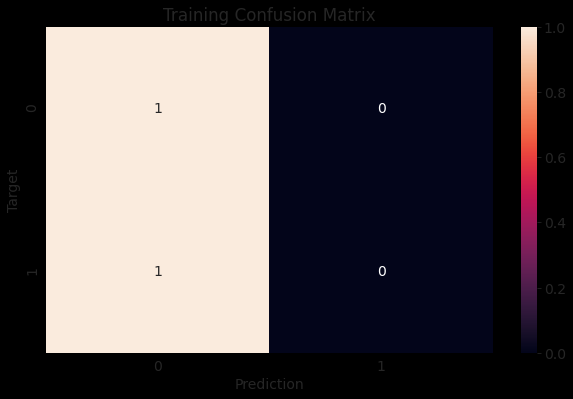

In [238]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 79.06%


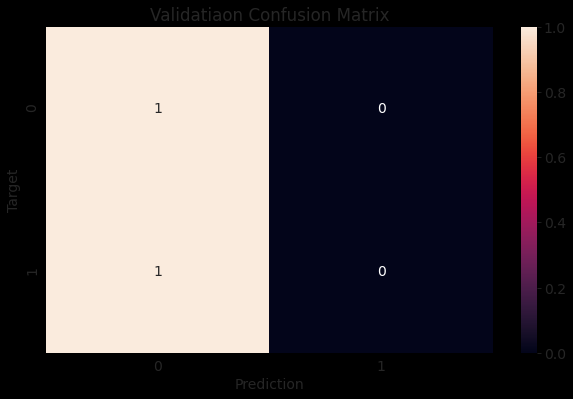

In [239]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 77.34%


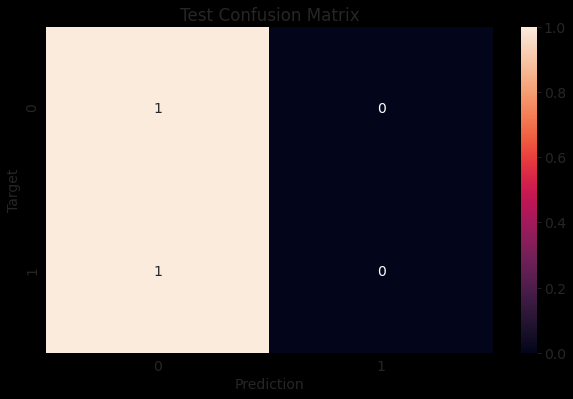

In [240]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [241]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [242]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [243]:
accuracy_score(test_targets, random_guess(X_test))

0.4957992998833139

In [244]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Making Prediction on Single Input

In [245]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [246]:
new_input_df = pd.DataFrame([new_input])

In [247]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [248]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [249]:
X_new_input = new_input_df[numeric_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am  
0       0.3904  0.888889  0.555556  0.694093

In [250]:
prediction = model.predict(X_new_input)[0]

In [251]:
prediction

'Yes'

In [252]:
prob = model.predict_proba(X_new_input)[0]

In [253]:
prob

array([4.4408921e-16, 1.0000000e+00])

In [254]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [258]:
new_input1 = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [260]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Saving and Loading Trained Models

In [261]:
import joblib

In [262]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [263]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [264]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [265]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.7734344612991054